# Initialisation

## Configuration hardware

In [ ]:
import cpuinfo
cpuinfo.get_cpu_info()['count']

12

In [ ]:
cpuinfo.get_cpu_info()['brand_raw']

'Intel(R) Xeon(R) CPU @ 2.20GHz'

In [ ]:
import psutil
import platform

In [ ]:
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))

Physical cores: 6
Total cores: 12


## Installations

In [ ]:
pip install -q dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 741.4/741.4 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install mlflow==2.22

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 128.8 MB/s eta 0:00:00
  Attempting uninstall: mlflow-skinny
    Found existing installation: mlflow-skinny 3.1.1
    Uninstalling mlflow-skinny-3.1.1:
      Successfully uninstalled mlflow-skinny-3.1.1
  Attempting uninstall: mlflow
    Found existing installation: mlflow 3.1.1
    Uninstalling mlflow-3.1.1:
      Successfully uninstalled mlflow-3.1.1


## Librairies

In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.base import clone

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [ ]:
import mlflow

In [ ]:
import time
import datetime

## Configuration Dagshub

In [ ]:
import dagshub
dagshub.auth.add_app_token('7ff59a8ec595a39c81790087b5fe632c13a71e8c')
dagshub.init(repo_owner='jonathan.durand25', repo_name='OC_P7', mlflow=True)

Accessing as jonathan.durand25

Initialized MLflow to track repo "jonathan.durand25/OC_P7"

Repository jonathan.durand25/OC_P7 initialized!

# Lecture des données

## Lecture des fichiers

In [ ]:
path = '/content/drive/My Drive/colab_datas/OC/P7/'

In [ ]:
print(os.listdir(path))

['HomeCredit_columns_description.csv', 'credit_card_balance.csv', 'bureau_balance.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'bureau.csv', 'installments_payments.csv', 'sample_submission.csv', 'previous_application.csv', 'application_train.csv', 'app_train_2.csv', 'app_train_3.csv', 'app_train_1.csv', 'app_train_4.csv']


In [ ]:
app_train = pd.read_csv(path+'application_train.csv')
print('Training data shape: ', app_train.shape)

Training data shape:  (307511, 122)


In [ ]:
app_test = pd.read_csv(path+'application_test.csv')
print('Testing data shape: ', app_test.shape)

Testing data shape:  (48744, 121)


## Visualisation des tables application

In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Pré traitement des données

## Répartition de la cible

In [ ]:
app_train['TARGET'].value_counts()/len(app_train)

,count
TARGET,
0,0.919271
1,0.080729


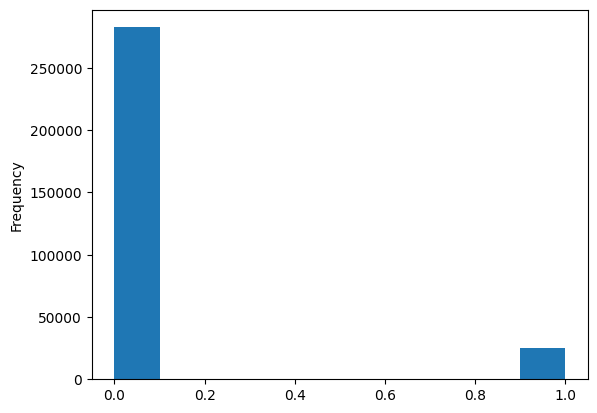

In [ ]:
app_train['TARGET'].astype(int).plot.hist();

## Taux de remplissage des colonnes

In [ ]:
sum(app_train.isnull().sum()==0)

55

In [ ]:
full_table = pd.DataFrame(app_train.isnull().sum()==0, columns=['full'])
full_table.loc[full_table['full']]

,full
SK_ID_CURR,True
TARGET,True
NAME_CONTRACT_TYPE,True
CODE_GENDER,True
FLAG_OWN_CAR,True
FLAG_OWN_REALTY,True
CNT_CHILDREN,True
AMT_INCOME_TOTAL,True
AMT_CREDIT,True
NAME_INCOME_TYPE,True


In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        features_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        features_table_ren_columns = features_table.rename(
        columns = {0 : 'Missing Values', 1 : '% miss of Total Values'})

        # Sort the table by index
        features_table_ren_columns = features_table_ren_columns.sort_index().round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(features_table_ren_columns.loc[
                features_table_ren_columns['% miss of Total Values']!=0].shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return features_table_ren_columns

In [ ]:
# Missing values statistics
features_df = missing_values_table(app_train)

Your selected dataframe has 122 columns.
There are 64 columns that have missing values.


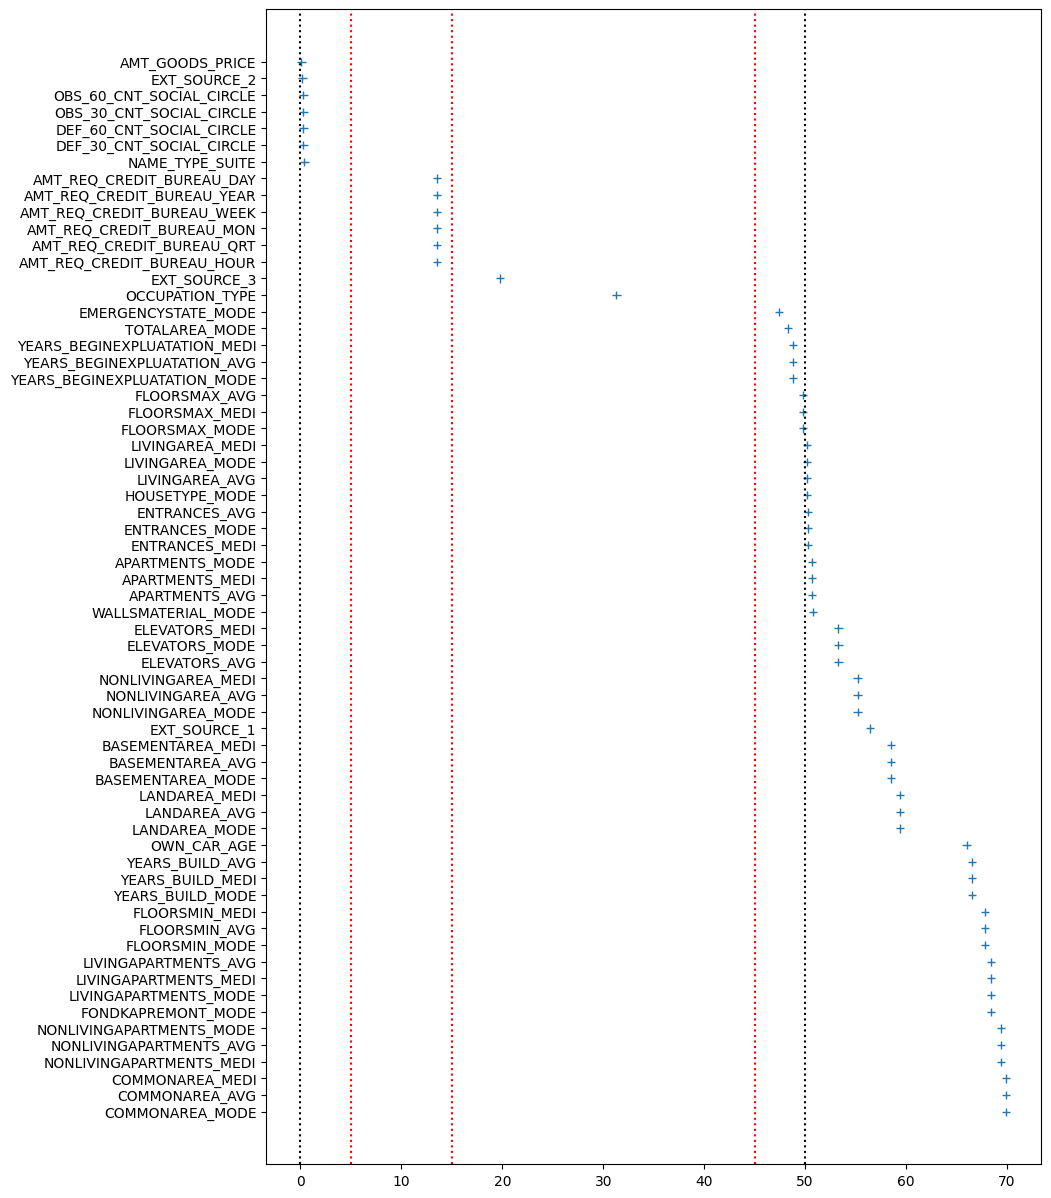

In [ ]:
data_plot = features_df.loc[
    features_df['% miss of Total Values']!=0].sort_values(
        '% miss of Total Values', ascending=False).round(1)

plt.figure(figsize = (10, 15))

plt.scatter(x=data_plot['% miss of Total Values'], y=data_plot.index, marker='+', ls='')

plt.axvline(0, c='k', ls=':')
plt.axvline(5, c='r', ls=':')
plt.axvline(15, c='r', ls=':')
plt.axvline(45, c='r', ls=':')
plt.axvline(50, c='k', ls=':')

plt.show()

## Types et encodage

In [ ]:
app_train.dtypes.value_counts()

,count
float64,65
int64,41
object,16


In [ ]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


3 colonnes et pas 4 car "EMERGENCYSTATE_MODE" comporte la valeur "No" et des NaN

In [ ]:
features_df.shape

(122, 2)

In [ ]:
app_train.shape

(307511, 122)

In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [ ]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [ ]:
features_df = missing_values_table(app_train)

Your selected dataframe has 240 columns.
There are 58 columns that have missing values.


In [ ]:
features_df.shape

(240, 2)

## Traitement particulier de certaines colonnes

### Age

In [ ]:
(app_train['DAYS_BIRTH'] / -365).describe()

,DAYS_BIRTH
count,307511.000000
mean,43.936973
std,11.956133
min,20.517808
25%,34.008219
50%,43.150685
75%,53.923288
max,69.120548


In [ ]:
app_train['BIRTH_YEARS'] = app_train['DAYS_BIRTH'] / -365
app_train = app_train.drop('DAYS_BIRTH', axis=1)

In [ ]:
features_df.loc['BIRTH_YEARS'] = features_df.loc['DAYS_BIRTH']
features_df = features_df.drop('DAYS_BIRTH')
features_df = features_df.sort_index()

### Temps d'emploi

In [ ]:
app_train['DAYS_EMPLOYED'].describe()

,DAYS_EMPLOYED
count,307511.000000
mean,63815.045904
std,141275.766519
min,-17912.000000
25%,-2760.000000
50%,-1213.000000
75%,-289.000000
max,365243.000000


In [ ]:
features_df.loc['DAYS_EMPLOYED']

,DAYS_EMPLOYED
Missing Values,0.0
% miss of Total Values,0.0


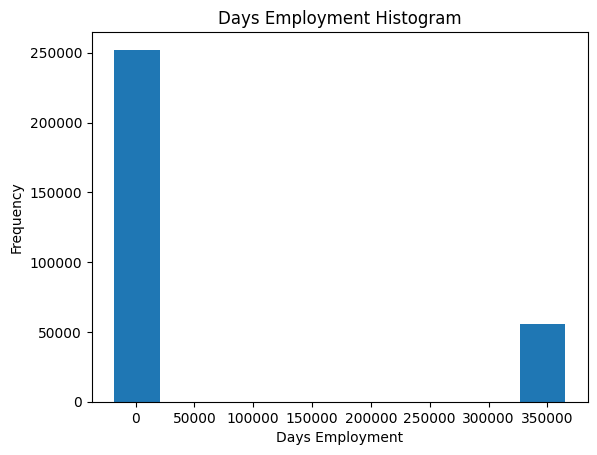

In [ ]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are {} anomalous days of employment ({:0.2f}%)'.format(len(anom), len(anom)/len(app_train)*100))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment (18.01%)


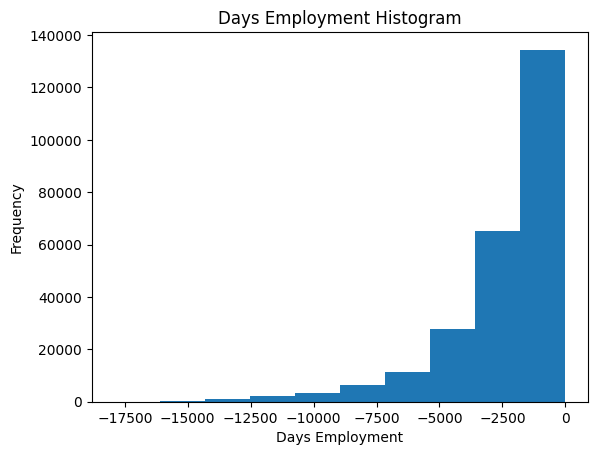

In [ ]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


In [ ]:
features_df.loc['DAYS_EMPLOYED_ANOM'] = features_df.loc['DAYS_EMPLOYED']


In [ ]:
features_df.loc['DAYS_EMPLOYED'] = [app_train['DAYS_EMPLOYED'].isnull().sum(), (app_train['DAYS_EMPLOYED'].isnull().sum()/len(app_train)*100).round(1)]
features_df = features_df.sort_index()

# Corrélations

In [ ]:
corr_matrix =  app_train.corr()

In [ ]:
correlations =corr_matrix['TARGET']

In [ ]:
features_df['target_correlation'] = correlations.sort_index()

In [ ]:
features_df = features_df.drop('TARGET')

In [ ]:
idx = np.argsort(np.abs(features_df['target_correlation']))

In [ ]:
idx_max = 10

In [ ]:
features_df.index[idx[::-1]][0:idx_max]

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'BIRTH_YEARS',
       'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [ ]:
features_df['top_corr'] = features_df.index.isin(features_df.index[idx[::-1]][0:idx_max])*1

# Autres traitements

In [ ]:
app_train['YEARS_CREDIT'] = app_train['AMT_CREDIT']/app_train['AMT_ANNUITY']

In [ ]:
app_train['YEARS_CREDIT'].describe()

,YEARS_CREDIT
count,307499.000000
mean,21.612322
std,7.823823
min,8.036674
25%,15.614496
50%,20.000000
75%,27.099985
max,45.305079


In [ ]:
app_train['RATIO_DEBT'] = app_train['AMT_ANNUITY']/app_train['AMT_INCOME_TOTAL']

In [ ]:
app_train['RATIO_DEBT'].describe()

,RATIO_DEBT
count,307499.000000
mean,0.180930
std,0.094574
min,0.000224
25%,0.114782
50%,0.162833
75%,0.229067
max,1.875965


In [ ]:
app_train[['TARGET', 'RATIO_DEBT', 'YEARS_CREDIT']].corr()['TARGET']

,TARGET
TARGET,1.000000
RATIO_DEBT,0.014265
YEARS_CREDIT,-0.032102


(0.0, 1.0)

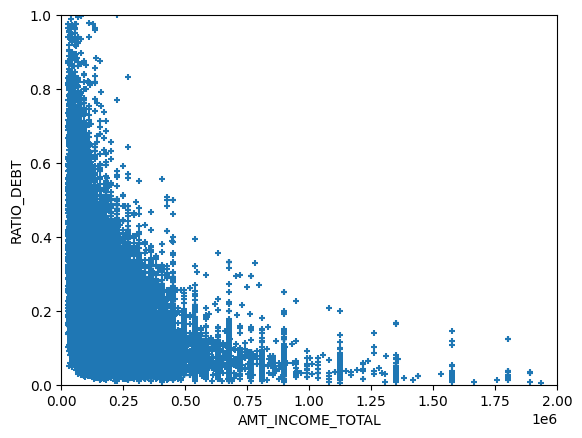

In [ ]:
app_train.plot.scatter(x='AMT_INCOME_TOTAL', y='RATIO_DEBT', marker='+')
ax = plt.gca()
ax.set_xlim([0,2e6])
ax.set_ylim([0,1])

# Entraînement

## Préparation

In [ ]:
app_train = app_train.drop(columns = ['RATIO_DEBT', 'YEARS_CREDIT'])

In [ ]:
param_grid_LR = {"C":[0.01, 0.1, 1, 10]}
param_grid_RF = {'n_estimators' : [50, 100], 'max_depth':[50, 70]}
param_grid_GB = {'n_estimators':[50, 100, 150, 200], 'learning_rate':[0.2, 0.5, 0.7, 1]}

In [ ]:
estimator_LR = LogisticRegression(class_weight='balanced')
estimator_RF = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=50)
estimator_GB = lgb.LGBMClassifier(objective='binary', random_state = 50, class_weight='balanced', verbose=-1, n_jobs=-1)

### Séparation des données en entraînement et test

In [ ]:
model_train, model_test = train_test_split(app_train, test_size = 0.25, stratify=app_train['TARGET'], random_state=50)

### Score

In [ ]:
def find_threshold(probas, y_true):

  # Calcul des grandeurs ROC
  [fpr, tpr, thr] = metrics.roc_curve(y_true, probas)

  # indice du premier seuil pour lequel
  # la spécificité est inférieure à 0.05
  # (cible de <5% de faux positif)
  idx = np.min(np.where(tpr>0.95))

  # calcul du seuil
  threshold = thr[idx]

  return threshold

In [ ]:
def calculate_score(y_pred, y_true):
  resultats_diff = y_pred-y_true

  # Calcul du score
  # Faux positif = 10
  # Faux négatif = 1
  score_tot = sum((resultats_diff<0)*10 + (resultats_diff>0))

  # score par prédiction
  score_pred = score_tot/(resultats_diff.shape[0])

  return score_pred

### Fonctions de validation

In [ ]:
estimator_dict = {}

In [ ]:
def cross_validation_custom(estimator, data_train, target, param_grid, cv_nb, score_fct):
  print("Nombre de combinaisons de paramètres : {}".format(len(ParameterGrid(param_grid))))
  print("Nombre de groupes de données : {}".format(cv_nb))
  print("Nombre d'itérations : {}".format(cv_nb*len(ParameterGrid(param_grid))))
  print("----------")

  skf = StratifiedKFold(n_splits=cv_nb)
  score_array = np.empty((len(ParameterGrid(param_grid)), cv_nb))
  score_array[:] = np.nan
  score_array_mean = np.empty(len(ParameterGrid(param_grid)))
  score_array_mean[:] = np.nan

  for i in range(len(ParameterGrid(param_grid))):

    print("Params : {}".format(ParameterGrid(param_grid)[i]))
    ti = time.time()
    estimator.set_params(**ParameterGrid(param_grid)[i])

    for j, (train_index, test_index) in enumerate(skf.split(data_train, target)):

      estimator.fit(data_train[train_index], target[train_index])

      threshold = find_threshold(estimator.predict_proba(data_train[train_index])[:,1], target[train_index])
      probas = (estimator.predict_proba(data_train[test_index])[:,1]>=threshold)*1

      score_array[i, j] = score_fct(probas, target[test_index])
      #print("     Fold {}, score = {}".format(j, score_array[j, i]))

    score_array_mean[i] = np.mean(score_array[i,:])
    print("  score = {:.3}, temps = {:.0f}s".format(score_array_mean[i], time.time()-ti))

  i_min = np.argmin(score_array_mean)

  best_est = clone(estimator)
  best_est.set_params(**ParameterGrid(param_grid)[i_min])
  best_est.fit(data_train, target)

  best_params = ParameterGrid(param_grid)[i_min]
  score_std = np.std(score_array_mean)

  return best_est, best_params, score_std

In [ ]:
def fit_dict_estimator(estimator, data_train, target, param_grid, cv_nb, score_fct):

  ti = time.time()

  best_estimator, best_params, score_std = cross_validation_custom(estimator, data_train, target, param_grid, cv_nb, score_fct)

  probas = best_estimator.predict_proba(data_train)[:, 1]
  threshold = find_threshold(probas, target)
  y_pred = (probas>=threshold)*1
  score = calculate_score(y_pred, target)

  time_min = (time.time()-ti)/60

  dict_return = {'estimator':best_estimator}
  dict_return['threshold'] = threshold
  dict_return['score'] = score
  dict_return['score_std'] = score_std
  dict_return['time_min'] = time_min

  print("----------")
  print("Temps total : {:.0f}min".format(time_min))
  print("Score : {:.3}".format(score))
  print("Score_std : {:.2E}".format(score_std))
  print("Seuil : {:.3}".format(threshold, 3))
  print("Meilleurs paramètres : {}".format(best_params))

  return dict_return

## Données totales

### Normalisation et imputations des données totales

In [ ]:
scaler_full_minMax = MinMaxScaler(feature_range = (0, 1))
scaler_full_standard = StandardScaler()

In [ ]:
scaler_full_minMax.fit(app_train.drop(columns=['TARGET']));
scaler_full_standard.fit(app_train.drop(columns=['TARGET']));

In [ ]:
data_train_full = model_train.drop(columns = ['TARGET'])
features_full = data_train_full.columns

In [ ]:
data_train_full_scaledMM = scaler_full_minMax.transform(data_train_full)
data_train_full_scaledS = scaler_full_standard.transform(data_train_full)

In [ ]:
imputer_full_med = SimpleImputer(strategy = 'median')

In [ ]:
imputer_full_med.fit(data_train_full_scaledMM)
data_train_full_scaledMM_impMed = imputer_full_med.transform(data_train_full_scaledMM)

In [ ]:
print('Training data shape: ', data_train_full_scaledMM_impMed.shape)

Training data shape:  (230633, 240)


### Régression logistique

#### Modèle

In [ ]:
name = 'RL_full'
param_grid = param_grid_LR
estimator = estimator_LR

In [ ]:
data_train = data_train_full_scaledMM_impMed
target = model_train['TARGET'].values

In [ ]:
estimator_dict[name] = fit_dict_estimator(estimator,
                                          data_train,
                                          target,
                                          param_grid,
                                          5,
                                          calculate_score)

Nombre de combinaisons de paramètres : 4
Nombre de groupes de données : 5
Nombre d'itérations : 20
----------
Params : {'C': 0.01}
  score = 0.745, temps = 29s
Params : {'C': 0.1}
  score = 0.742, temps = 54s
Params : {'C': 1}
  score = 0.741, temps = 54s
Params : {'C': 10}
  score = 0.74, temps = 54s
----------
Temps total : 3min
Score : 0.738
Score_std : 1.59E-03
Seuil : 0.248
Meilleurs paramètres : {'C': 10}


#### Composantes les plus importantes

In [ ]:
idx = np.argsort(np.abs(estimator_dict[name]['estimator'].coef_))

In [ ]:
features_full[idx[0][::-1]][0:idx_max]

Index(['AMT_GOODS_PRICE', 'AMT_CREDIT', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'EXT_SOURCE_3',
       'EXT_SOURCE_2', 'FLAG_DOCUMENT_2', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_WEEK'],
      dtype='object')

In [ ]:
features_df['top_RL'] = features_df.index.isin(features_full[idx[0][::-1]][0:idx_max])*1

### Random Forest

#### Modèle

In [ ]:
name = 'RF_full'
estimator = estimator_RF
param_grid = param_grid_RF

In [ ]:
data_train = data_train_full_scaledMM_impMed
target = model_train['TARGET'].values

In [ ]:
estimator_dict[name] = fit_dict_estimator(estimator,
                                          data_train,
                                          target,
                                          param_grid,
                                          5,
                                          calculate_score)

Nombre de combinaisons de paramètres : 4
Nombre de groupes de données : 5
Nombre d'itérations : 20
----------
Params : {'n_estimators': 50, 'max_depth': 50}
  score = 0.806, temps = 34s
Params : {'n_estimators': 100, 'max_depth': 50}
  score = 0.806, temps = 60s
Params : {'n_estimators': 50, 'max_depth': 70}
  score = 0.806, temps = 34s
Params : {'n_estimators': 100, 'max_depth': 70}
  score = 0.807, temps = 61s
----------
Temps total : 3min
Score : 0.0346
Score_std : 5.42E-04
Seuil : 0.56
Meilleurs paramètres : {'n_estimators': 50, 'max_depth': 50}


#### Composantes les plus importantes

In [ ]:
idx = np.argsort(np.abs(estimator_dict[name]['estimator'].feature_importances_))

In [ ]:
features_full[idx[::-1]][0:idx_max]

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'BIRTH_YEARS', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'DAYS_REGISTRATION', 'AMT_CREDIT',
       'EXT_SOURCE_1', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [ ]:
features_df['top_RF'] = features_df.index.isin(features_full[idx[::-1]][0:idx_max])*1

### Gradient boosting

#### Modèle

In [ ]:
name = 'GB_full'
estimator = estimator_GB
param_grid = param_grid_GB

In [ ]:
data_train = data_train_full_scaledMM_impMed
target = model_train['TARGET'].values

In [ ]:
estimator_dict[name] = fit_dict_estimator(estimator,
                                          data_train,
                                          target,
                                          param_grid,
                                          5,
                                          calculate_score)

Nombre de combinaisons de paramètres : 16
Nombre de groupes de données : 5
Nombre d'itérations : 80
----------
Params : {'n_estimators': 50, 'learning_rate': 0.2}
  score = 0.649, temps = 12s
Params : {'n_estimators': 100, 'learning_rate': 0.2}
  score = 0.602, temps = 15s
Params : {'n_estimators': 150, 'learning_rate': 0.2}
  score = 0.576, temps = 18s
Params : {'n_estimators': 200, 'learning_rate': 0.2}
  score = 0.564, temps = 21s
Params : {'n_estimators': 50, 'learning_rate': 0.5}
  score = 0.616, temps = 12s
Params : {'n_estimators': 100, 'learning_rate': 0.5}
  score = 0.586, temps = 14s
Params : {'n_estimators': 150, 'learning_rate': 0.5}
  score = 0.583, temps = 17s
Params : {'n_estimators': 200, 'learning_rate': 0.5}
  score = 0.595, temps = 19s
Params : {'n_estimators': 50, 'learning_rate': 0.7}
  score = 0.616, temps = 11s
Params : {'n_estimators': 100, 'learning_rate': 0.7}
  score = 0.6, temps = 14s
Params : {'n_estimators': 150, 'learning_rate': 0.7}
  score = 0.607, temp

#### Composantes les plus importantes

In [ ]:
idx = np.argsort(np.abs(estimator_dict[name]['estimator'].feature_importances_))

In [ ]:
features_full[idx[::-1]][0:idx_max]

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'BIRTH_YEARS', 'EXT_SOURCE_1',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_ANNUITY',
       'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [ ]:
features_df['top_GB'] = features_df.index.isin(features_full[idx[::-1]][0:idx_max])*1

## Sélection des composantes

### Représentation des composantes les plus importantes

In [ ]:
features_df['importance_tot'] = features_df['top_corr'] + features_df['top_RL'] + features_df['top_RF'] + features_df['top_GB']

In [ ]:
features_df['feature'] = features_df.index

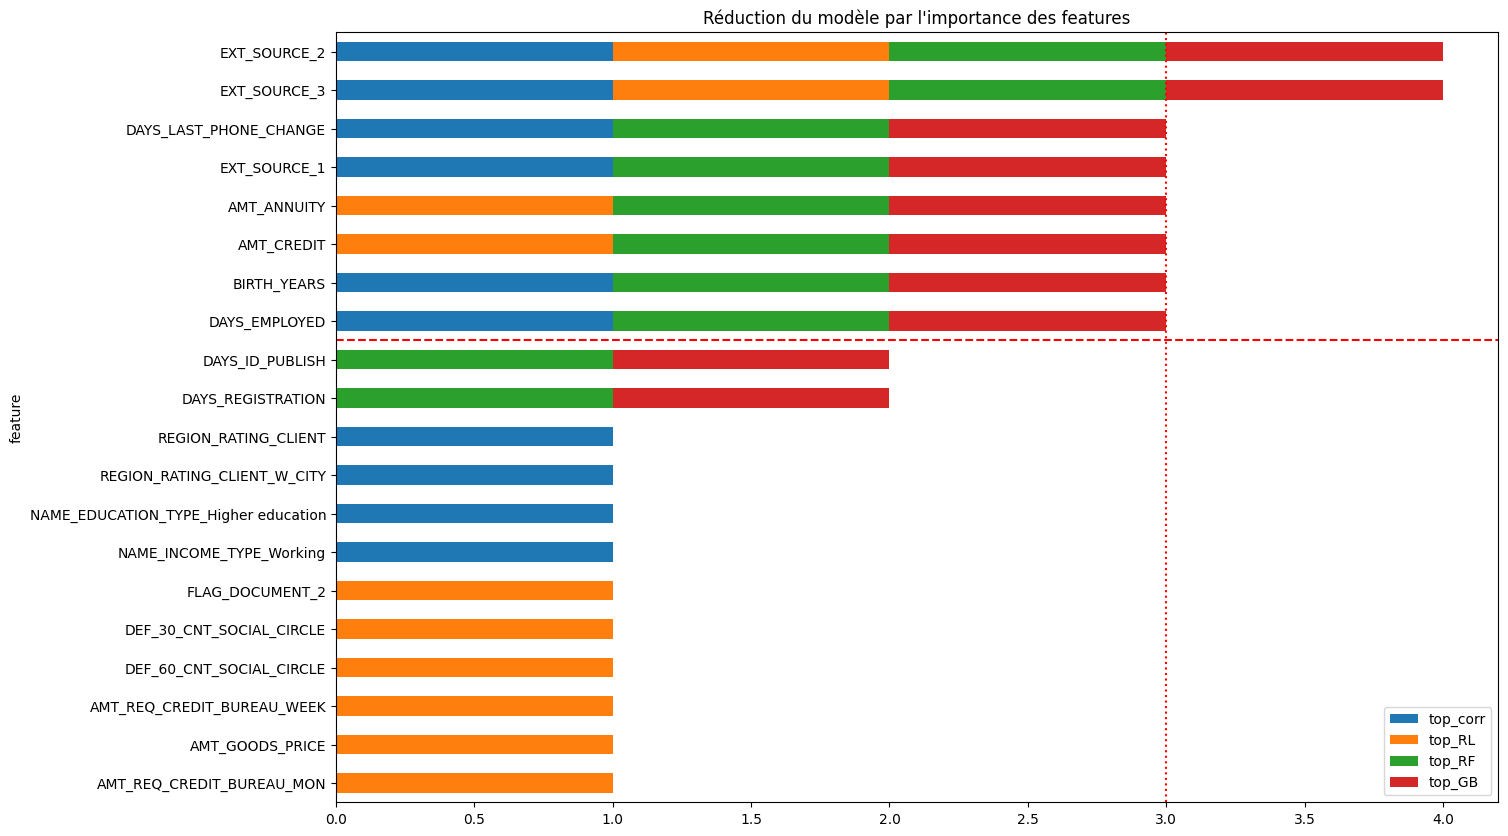

In [ ]:
idx = np.argsort(features_df['importance_tot'])[::-1]
idx_max = next(x[0] for x in enumerate(features_df['importance_tot'][idx]) if x[1] < 3)

plt.figure(figsize=(15,10))

ax = plt.subplot(1,1,1)
features_df.loc[
features_df['importance_tot']>0
].sort_values('importance_tot').plot.barh(ax=ax, x='feature', y=['top_corr', 'top_RL', 'top_RF', 'top_GB'], stacked=True)
ax.axhline(len(features_df.loc[features_df['importance_tot']>0])-idx_max-0.5, linestyle='--', color='r')
ax.axvline(3, linestyle=':', color='r')
plt.title('Réduction du modèle par l\'importance des features')
plt.show()

### Choix des composantes

In [ ]:
features_sel = ['EXT_SOURCE_1',
                'EXT_SOURCE_2',
                'EXT_SOURCE_3',
                'DAYS_EMPLOYED',
                'BIRTH_YEARS',
                'AMT_CREDIT',
                'AMT_ANNUITY',
                'DAYS_LAST_PHONE_CHANGE']

### Remplissage des composantes

In [ ]:
features_df.loc[features_df['feature'].isin(features_sel), '% miss of Total Values']

,% miss of Total Values
AMT_ANNUITY,0.0
AMT_CREDIT,0.0
BIRTH_YEARS,0.0
DAYS_EMPLOYED,18.0
DAYS_LAST_PHONE_CHANGE,0.0
EXT_SOURCE_1,56.4
EXT_SOURCE_2,0.2
EXT_SOURCE_3,19.8


In [ ]:
abs(corr_matrix['EXT_SOURCE_1']).sort_values()

,EXT_SOURCE_1
NAME_TYPE_SUITE_Group of people,0.000037
SK_ID_CURR,0.000082
ORGANIZATION_TYPE_Cleaning,0.000174
FLAG_DOCUMENT_16,0.000186
OCCUPATION_TYPE_IT staff,0.000214
...,...
CODE_GENDER_F,0.306729
CODE_GENDER_M,0.306737
BIRTH_YEARS,0.600610
EXT_SOURCE_1,1.000000


On voit que la composante 'EXT_SOURCE_1' (peu souvent renseignée) est très corrélée avec l'âge (très souvent renseigné).

On ne gardera donc que la composante d'âge

In [ ]:
features_sel.remove('EXT_SOURCE_1')

## Composantes sélectionnées

### Sélection des données

In [ ]:
app_train_sel = app_train[features_sel+['TARGET']]
model_train_sel = model_train[features_sel+['TARGET']]
model_test_sel = model_test[features_sel+['TARGET']]

### Normalisation

In [ ]:
scaler_sel_minMax = MinMaxScaler(feature_range = (0, 1))
scaler_sel_standard = StandardScaler()

In [ ]:
scaler_sel_minMax.fit(app_train_sel.drop(columns=['TARGET']));
scaler_sel_standard.fit(app_train_sel.drop(columns=['TARGET']));

In [ ]:
data_train_sel = model_train_sel.drop(columns = ['TARGET'])

In [ ]:
data_train_sel_scaledMM = scaler_sel_minMax.transform(data_train_sel)
data_train_sel_scaledS = scaler_sel_standard.transform(data_train_sel)

In [ ]:
data_train_sel_scaledMM_df = pd.DataFrame(data=data_train_sel_scaledMM, columns=features_sel)

### Imputation médiane

#### Imputation

In [ ]:
imputer_sel_med = SimpleImputer(strategy = 'median')

In [ ]:
imputer_sel_med.fit(data_train_sel_scaledMM)
data_train_sel_scaledMM_impMed = imputer_sel_med.transform(data_train_sel_scaledMM)

In [ ]:
print('Training data shape: ', data_train_sel_scaledMM_impMed.shape)

Training data shape:  (230633, 7)


#### Régression logistique

In [ ]:
name = 'LR_sel_med'
estimator = estimator_LR
param_grid = param_grid_LR

In [ ]:
data_train = data_train_sel_scaledMM_impMed
target = model_train_sel['TARGET'].values

In [ ]:
estimator_dict[name] = fit_dict_estimator(estimator,
                                          data_train,
                                          target,
                                          param_grid,
                                          5,
                                          calculate_score)

Nombre de combinaisons de paramètres : 4
Nombre de groupes de données : 5
Nombre d'itérations : 20
----------
Params : {'C': 0.01}
  score = 0.782, temps = 5s
Params : {'C': 0.1}
  score = 0.782, temps = 7s
Params : {'C': 1}
  score = 0.782, temps = 8s
Params : {'C': 10}
  score = 0.782, temps = 7s
----------
Temps total : 0min
Score : 0.782
Score_std : 1.48E-04
Seuil : 0.273
Meilleurs paramètres : {'C': 0.1}


#### Random Forest

In [ ]:
name = 'RF_sel_med'
estimator = estimator_RF
param_grid = param_grid_RF

In [ ]:
data_train = data_train_sel_scaledMM_impMed
target = model_train_sel['TARGET'].values

In [ ]:
estimator_dict[name] = fit_dict_estimator(estimator,
                                          data_train,
                                          target,
                                          param_grid,
                                          5,
                                          calculate_score)

Nombre de combinaisons de paramètres : 4
Nombre de groupes de données : 5
Nombre d'itérations : 20
----------
Params : {'n_estimators': 50, 'max_depth': 50}
  score = 0.804, temps = 21s
Params : {'n_estimators': 100, 'max_depth': 50}
  score = 0.806, temps = 38s
Params : {'n_estimators': 50, 'max_depth': 70}
  score = 0.804, temps = 20s
Params : {'n_estimators': 100, 'max_depth': 70}
  score = 0.806, temps = 38s
----------
Temps total : 2min
Score : 0.0317
Score_std : 1.04E-03
Seuil : 0.56
Meilleurs paramètres : {'n_estimators': 50, 'max_depth': 70}


#### Gradient boosting

In [ ]:
name = 'GB_sel_med'
estimator = estimator_GB
param_grid = param_grid_GB

In [ ]:
data_train = data_train_sel_scaledMM_impMed
target = model_train_sel['TARGET'].values

In [ ]:
estimator_dict[name] = fit_dict_estimator(estimator,
                                          data_train,
                                          target,
                                          param_grid,
                                          5,
                                          calculate_score)

Nombre de combinaisons de paramètres : 16
Nombre de groupes de données : 5
Nombre d'itérations : 80
----------
Params : {'n_estimators': 50, 'learning_rate': 0.2}
  score = 0.712, temps = 2s
Params : {'n_estimators': 100, 'learning_rate': 0.2}
  score = 0.67, temps = 5s
Params : {'n_estimators': 150, 'learning_rate': 0.2}
  score = 0.641, temps = 4s
Params : {'n_estimators': 200, 'learning_rate': 0.2}
  score = 0.622, temps = 5s
Params : {'n_estimators': 50, 'learning_rate': 0.5}
  score = 0.683, temps = 2s
Params : {'n_estimators': 100, 'learning_rate': 0.5}
  score = 0.641, temps = 5s
Params : {'n_estimators': 150, 'learning_rate': 0.5}
  score = 0.625, temps = 3s
Params : {'n_estimators': 200, 'learning_rate': 0.5}
  score = 0.622, temps = 4s
Params : {'n_estimators': 50, 'learning_rate': 0.7}
  score = 0.675, temps = 2s
Params : {'n_estimators': 100, 'learning_rate': 0.7}
  score = 0.647, temps = 4s
Params : {'n_estimators': 150, 'learning_rate': 0.7}
  score = 0.637, temps = 3s
Pa

### Imputation KNN

#### Imputation

In [ ]:
imputer_sel_KNN = KNNImputer(n_neighbors=3)

In [ ]:
imputer_sel_KNN.fit(data_train_sel_scaledMM)
data_train_sel_scaledMM_impKNN = imputer_sel_KNN.transform(data_train_sel_scaledMM)

In [ ]:
print('Training data shape: ', data_train_sel_scaledMM_impKNN.shape)

Training data shape:  (230633, 7)


#### Régression logistique

In [ ]:
name = 'RL_sel_KNN'
estimator = estimator_LR
param_grid = param_grid_LR

In [ ]:
data_train = data_train_sel_scaledMM_impKNN
target = model_train_sel['TARGET'].values

In [ ]:
estimator_dict[name] = fit_dict_estimator(estimator,
                                          data_train,
                                          target,
                                          param_grid,
                                          5,
                                          calculate_score)

Nombre de combinaisons de paramètres : 4
Nombre de groupes de données : 5
Nombre d'itérations : 20
----------
Params : {'C': 0.01}
  score = 0.788, temps = 6s
Params : {'C': 0.1}
  score = 0.789, temps = 10s
Params : {'C': 1}
  score = 0.788, temps = 9s
Params : {'C': 10}
  score = 0.788, temps = 9s
----------
Temps total : 1min
Score : 0.788
Score_std : 3.24E-04
Seuil : 0.275
Meilleurs paramètres : {'C': 0.01}


#### Random Forest

In [ ]:
name = 'RF_sel_KNN'
estimator = estimator_RF
param_grid = param_grid_RF

In [ ]:
data_train = data_train_sel_scaledMM_impKNN
target = model_train_sel['TARGET'].values

In [ ]:
estimator_dict[name] = fit_dict_estimator(estimator,
                                          data_train,
                                          target,
                                          param_grid,
                                          5,
                                          calculate_score)

Nombre de combinaisons de paramètres : 4
Nombre de groupes de données : 5
Nombre d'itérations : 20
----------
Params : {'n_estimators': 50, 'max_depth': 50}
  score = 0.804, temps = 21s
Params : {'n_estimators': 100, 'max_depth': 50}
  score = 0.806, temps = 39s
Params : {'n_estimators': 50, 'max_depth': 70}
  score = 0.804, temps = 21s
Params : {'n_estimators': 100, 'max_depth': 70}
  score = 0.806, temps = 39s
----------
Temps total : 2min
Score : 0.031
Score_std : 9.98E-04
Seuil : 0.56
Meilleurs paramètres : {'n_estimators': 50, 'max_depth': 50}


#### Gradient boosting

In [ ]:
name = 'GB_sel_KNN'
estimator = estimator_GB
param_grid = param_grid_GB

In [ ]:
data_train = data_train_sel_scaledMM_impKNN
target = model_train_sel['TARGET'].values

In [ ]:
estimator_dict[name] = fit_dict_estimator(estimator,
                                          data_train,
                                          target,
                                          param_grid,
                                          5,
                                          calculate_score)

Nombre de combinaisons de paramètres : 16
Nombre de groupes de données : 5
Nombre d'itérations : 80
----------
Params : {'n_estimators': 50, 'learning_rate': 0.2}
  score = 0.714, temps = 3s
Params : {'n_estimators': 100, 'learning_rate': 0.2}
  score = 0.679, temps = 4s
Params : {'n_estimators': 150, 'learning_rate': 0.2}
  score = 0.65, temps = 4s
Params : {'n_estimators': 200, 'learning_rate': 0.2}
  score = 0.63, temps = 5s
Params : {'n_estimators': 50, 'learning_rate': 0.5}
  score = 0.684, temps = 4s
Params : {'n_estimators': 100, 'learning_rate': 0.5}
  score = 0.647, temps = 3s
Params : {'n_estimators': 150, 'learning_rate': 0.5}
  score = 0.633, temps = 3s
Params : {'n_estimators': 200, 'learning_rate': 0.5}
  score = 0.626, temps = 6s
Params : {'n_estimators': 50, 'learning_rate': 0.7}
  score = 0.682, temps = 2s
Params : {'n_estimators': 100, 'learning_rate': 0.7}
  score = 0.65, temps = 3s
Params : {'n_estimators': 150, 'learning_rate': 0.7}
  score = 0.639, temps = 4s
Para

# Test

## Fonctions

In [ ]:
def run_mlflow(auc, score_train, score_test, model, name):
  with mlflow.start_run(run_name=name):
    mlflow.log_metric('roc_auc', auc)
    mlflow.log_metric('score_train', score_train)
    mlflow.log_metric('score_test', score_test)
    mlflow.sklearn.log_model(model, name)

In [ ]:
def auc_plot(fpr, tpr, thr, idx):
  plt.plot(fpr, tpr, color='coral', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('1 - specificite', fontsize=14)
  plt.ylabel('Sensibilite', fontsize=14)
  plt.show()

  print("Sensibilité : {:.2f}".format(tpr[idx]))
  print("Spécificité : {:.2f}".format(1-fpr[idx]))
  print("Seuil : {:.2f}".format(thr[idx]))

In [ ]:
def mlflow_print(name, data_test, target):

  estimator_mlflow = estimator_dict[name]['estimator']
  score_train = estimator_dict[name]['score']
  score_std = estimator_dict[name]['score_std']
  time_min = estimator_dict[name]['time_min']
  threshold = estimator_dict[name]['threshold']

  print(name)
  print('score_train = {:.3}'.format(score_train))
  print('score_std = {:.2E}'.format(score_std))
  print('temps d''entraînement = {:.0f}min'.format(time_min))
  print('seuil = {:.3}'.format(threshold))


  probas_test = estimator_mlflow.predict_proba(data_test)[:, 1]

  auc = roc_auc_score(target, probas_test)
  score_test = calculate_score(probas_test, target)

  print('auc = {}'.format(auc))
  print('score_test = {}'.format(score_test))

  with mlflow.start_run(run_name=name):
    mlflow.log_metric('roc_auc', auc)
    mlflow.log_metric('score_train', score_train)
    mlflow.log_metric('score_std', score_std)
    mlflow.log_metric('score_test', score_test)
    mlflow.log_metric('time_min', time_min)
    mlflow.sklearn.log_model(estimator_mlflow, name)

  #auc_plot(fpr, tpr, thr, idx)

## Imputation sur les données test

In [ ]:
model_test.shape

(76878, 241)

In [ ]:
mlflow.set_experiment('OC_P7')

<Experiment: artifact_location='mlflow-artifacts:/4044264bd40a4af89052bc4acae19979', creation_time=1749758876112, experiment_id='4', last_update_time=1749758876112, lifecycle_stage='active', name='OC_P7', tags={}>

### Préparation des données

In [ ]:
data_test_full = model_test.drop(columns = ['TARGET'])

In [ ]:
data_test_full_scaledMM = scaler_full_minMax.transform(data_test_full)

In [ ]:
data_test_full_scaledMM_impMed = imputer_full_med.transform(data_test_full_scaledMM)

In [ ]:
print('Training data shape: ', data_test_full_scaledMM_impMed.shape)

Training data shape:  (76878, 240)


In [ ]:
data_test_full_scaledMM_impMed_df = pd.DataFrame(data=data_test_full_scaledMM_impMed, columns = features_full)

### Enregistrements MLFLOW

#### Données totales

In [ ]:
mlflow_print('RL_full', data_test_full_scaledMM_impMed_df, model_test['TARGET'])

RL_full
score_train = 0.738
score_std = 1.59E-03
temps dentraînement = 3min
seuil = 0.248
auc = 0.7417544963680376
score_test = 1.7265277452587215


2025/07/11 08:35:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RL_full at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/402ba0b72d6942749383ab2fcc21f310
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [ ]:
mlflow_print('RF_full', data_test_full_scaledMM_impMed_df, model_test['TARGET'])

RF_full
score_train = 0.0346
score_std = 5.42E-04
temps dentraînement = 3min
seuil = 0.56
auc = 0.6966305537189649
score_test = 1.648182835141393


2025/07/11 08:36:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_full at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/bfb0fd6205394a1593bc20cb2fa48f52
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [ ]:
mlflow_print('GB_full', data_test_full_scaledMM_impMed_df, model_test['TARGET'])

GB_full
score_train = 0.422
score_std = 2.48E-02
temps dentraînement = 4min
seuil = 0.356
auc = 0.7439741640328351
score_test = 1.7265277452587215


2025/07/11 08:36:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_full at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/697cbcfb5aff459fb7b863dcdac201ac
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


#### Composantes sélectionnées

In [ ]:
data_test_sel_scaledMM_impMed_df = data_test_full_scaledMM_impMed_df[features_sel]

##### Modèles avec imputation médiane

In [ ]:
mlflow_print('LR_sel_med', data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

LR_sel_med
score_train = 0.782
score_std = 1.48E-04
temps dentraînement = 0min
seuil = 0.273
auc = 0.7129944412467256
score_test = 1.7265277452587215


2025/07/11 08:36:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LR_sel_med at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/fbf1f9490ada4f6b9146d2d5851f4cfb
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [ ]:
mlflow_print('RF_sel_med', data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

RF_sel_med
score_train = 0.0317
score_std = 1.04E-03
temps dentraînement = 2min
seuil = 0.56
auc = 0.678688235725124
score_test = 1.5824162959494263


2025/07/11 08:36:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_sel_med at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/fa1ccfb2e0814e3d9261f7098c3d60c9
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [ ]:
mlflow_print('GB_sel_med', data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

GB_sel_med
score_train = 0.387
score_std = 2.42E-02
temps dentraînement = 1min
seuil = 0.384
auc = 0.6984348908459544
score_test = 1.7265277452587215


2025/07/11 08:37:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_sel_med at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/2db02a52ecfa45d6850e2b94168da0fa
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


##### Modèles avec imputation KNN

In [ ]:
mlflow_print('RL_sel_KNN', data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

RL_sel_KNN
score_train = 0.788
score_std = 3.24E-04
temps dentraînement = 1min
seuil = 0.275
auc = 0.7122783654341096
score_test = 1.7265277452587215


2025/07/11 08:37:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RL_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/cecf378cf5b24a1b9fb0ebb9f9739f37
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [ ]:
mlflow_print('RF_sel_KNN', data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

RF_sel_KNN
score_train = 0.031
score_std = 9.98E-04
temps dentraînement = 2min
seuil = 0.56
auc = 0.6751869840151916
score_test = 1.5952288040791904


2025/07/11 08:37:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/cf33461d0ed049369d6f48ffc34da406
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [ ]:
mlflow_print('GB_sel_KNN', data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

GB_sel_KNN
score_train = 0.399
score_std = 2.35E-02
temps dentraînement = 1min
seuil = 0.374
auc = 0.6905913294068393
score_test = 1.7265277452587215


2025/07/11 08:38:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/b6ec2d20fcec4e238cf253bb30ec9172
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


## Utilisation des données test pleines

In [ ]:
mlflow.set_experiment('OC_P7_nonempty')

<Experiment: artifact_location='mlflow-artifacts:/a2b4f0fe847942389caff38de69e8744', creation_time=1751362162147, experiment_id='5', last_update_time=1751362162147, lifecycle_stage='active', name='OC_P7_nonempty', tags={}>

### Préparation des données

In [ ]:
model_test_sel = model_test[features_sel+['TARGET']]
model_test_sel_nonempty = model_test_sel.loc[model_test_sel.isnull().sum(axis=1)==0]

In [ ]:
data_test_sel_nonempty = model_test_sel_nonempty.drop(columns='TARGET')

In [ ]:
data_test_sel_scaledMM_nonempty = scaler_sel_minMax.transform(data_test_sel_nonempty)

In [ ]:
data_test_sel_scaledMM_nonempty.shape

(50412, 7)

In [ ]:
round(data_test_sel_scaledMM_nonempty.shape[0]/data_test_sel_scaledMM_impMed_df.shape[0]*100,1)

65.6

### Enregistrements MLFLOW

#### Imputation médiane

In [ ]:
mlflow_print('LR_sel_med', data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

LR_sel_med
score_train = 0.782
score_std = 1.48E-04
temps dentraînement = 0min
seuil = 0.273
auc = 0.7215529330606008
score_test = 1.7446441323494406


2025/07/11 08:38:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LR_sel_med at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/3b9b0a119359442499c5ad30b10f9160
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


In [ ]:
mlflow_print('RF_sel_med', data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

RF_sel_med
score_train = 0.0317
score_std = 1.04E-03
temps dentraînement = 2min
seuil = 0.56
auc = 0.687419886630981
score_test = 1.6105689121637705


2025/07/11 08:38:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_sel_med at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/6f86bdcb442843e8b998810c5ea20802
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


In [ ]:
mlflow_print('GB_sel_med', data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

GB_sel_med
score_train = 0.387
score_std = 2.42E-02
temps dentraînement = 1min
seuil = 0.384
auc = 0.7029197789399477
score_test = 1.7446441323494406


2025/07/11 08:39:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_sel_med at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/dbb614d0e8344362a1da13f82ecafd70
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


#### Imputations KNN

In [ ]:
mlflow_print('RL_sel_KNN', data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

RL_sel_KNN
score_train = 0.788
score_std = 3.24E-04
temps dentraînement = 1min
seuil = 0.275
auc = 0.7215660609918605
score_test = 1.7446441323494406


2025/07/11 08:39:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RL_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/042f58ea424a4213b784e83be5e6ede7
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


In [ ]:
mlflow_print('RF_sel_KNN', data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

RF_sel_KNN
score_train = 0.031
score_std = 9.98E-04
temps dentraînement = 2min
seuil = 0.56
auc = 0.6871588704858601
score_test = 1.616916607157026


2025/07/11 08:39:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/8fe9fc2df9b743c5bca7fcd0b8b7dfae
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


In [ ]:
mlflow_print('GB_sel_KNN', data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

GB_sel_KNN
score_train = 0.399
score_std = 2.35E-02
temps dentraînement = 1min
seuil = 0.374
auc = 0.7003833972919887
score_test = 1.7446441323494406


2025/07/11 08:40:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/b9d901544d3546089c50ca4275af647a
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5
